In [8]:
!pip install nltk
import nltk
nltk.download('stopwords')
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Mounted at /content/gdrive


In [4]:
data = pd.read_csv('/content/gdrive/MyDrive/Dataset/Restaurant_Reviews.tsv',delimiter='\t',quoting=3)
print(data.head())

                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1


In [9]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Split into words
    text = [word for word in text if word not in stopwords.words('english')]  # Remove stop words
    return ' '.join(text)

data['cleaned_review'] = data['Review'].apply(preprocess_text)

In [11]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_review']).toarray()
y = data['Liked']  # Assuming 'Liked' is the column with sentiment labels

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.77      0.87      0.81       152
           1       0.84      0.73      0.78       148

    accuracy                           0.80       300
   macro avg       0.81      0.80      0.80       300
weighted avg       0.81      0.80      0.80       300



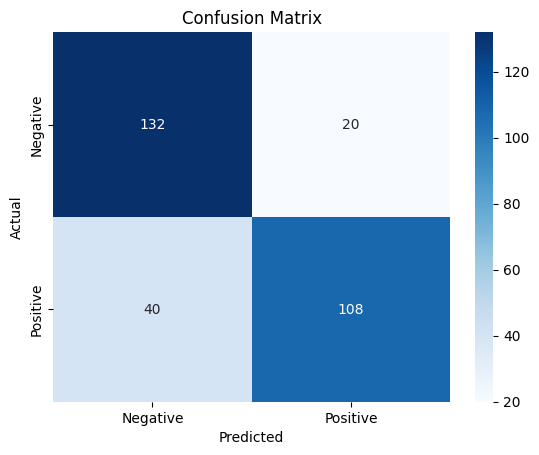

In [14]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:
def predict_sentiment(review):
    cleaned_review = preprocess_text(review)
    vectorized_review = vectorizer.transform([cleaned_review]). toarray()
    prediction = model.predict(vectorized_review)
    if prediction[0] == 1:
      return "Positive"
    else:
      return "Negative"

for review in data['Review']:
    sentiment = predict_sentiment(review)
    print(f"Review: {review}\nSentiment: {sentiment}\n")

Review: Wow... Loved this place.
Sentiment: Positive

Review: Crust is not good.
Sentiment: Positive

Review: Not tasty and the texture was just nasty.
Sentiment: Positive

Review: Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.
Sentiment: Positive

Review: The selection on the menu was great and so were the prices.
Sentiment: Positive

Review: Now I am getting angry and I want my damn pho.
Sentiment: Negative

Review: Honeslty it didn't taste THAT fresh.)
Sentiment: Negative

Review: The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.
Sentiment: Negative

Review: The fries were great too.
Sentiment: Positive

Review: A great touch.
Sentiment: Positive

Review: Service was very prompt.
Sentiment: Negative

Review: Would not go back.
Sentiment: Negative

Review: The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.
Sentiment: Negative

Review: